In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [142]:
df=pd.read_csv("ExData2.csv")
df.head()

,Bedrooms,Area,Price
0,1,Madina,800.0
1,2,East Legon,2000.0
2,2,Madina,1200.0
3,2,Madina,1600.0
4,2,Madina,1200.0


In [143]:
df.tail()

,Bedrooms,Area,Price
36,2,East Legon,NaN
37,1,Madina,NaN
38,3,Madina,NaN
39,3,East Legon,NaN
40,1,East Legon,NaN


In [144]:
df.dropna(inplace=True)

In [145]:
import numpy as np
df=pd.get_dummies(df,columns=["Area"], dtype=int)
df=df.drop("Area_Madina", axis=1)
df.head()

,Bedrooms,Price,Area_East Legon
0,1,800.0,0
1,2,2000.0,1
2,2,1200.0,0
3,2,1600.0,0
4,2,1200.0,0


<Axes: >

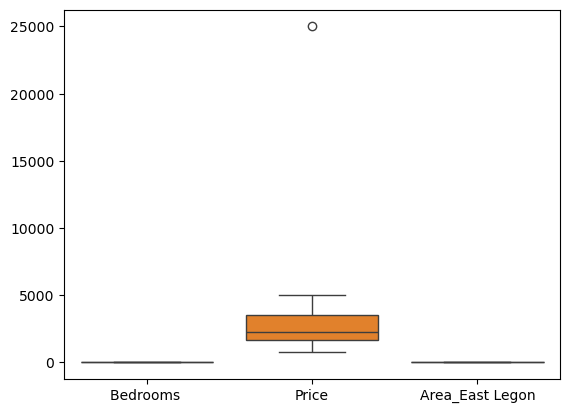

In [146]:
sns.boxplot(data=df)

In [147]:

IQR =df["Price"].quantile(0.75) - df["Price"].quantile(0.25)

lower_Price_limit = df["Price"].quantile(0.25) - (IQR * 1.5)
upper_Price_limit = df["Price"].quantile(0.75) + (IQR * 1.5)

print(lower_Price_limit)
print(upper_Price_limit)

-1000.0
6200.0


In [148]:
df=df[(df["Price"] >= lower_Price_limit) & (df["Price"] <= upper_Price_limit)] #To filter out the outliers

In [149]:
#sns.pairplot(df)

In [150]:
X=df.drop("Price", axis=1)
y=df["Price"]

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, shuffle=True)

In [152]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [153]:
model.intercept_

202.81531531531573

In [154]:
model.coef_

array([ 765.35285285, 1663.81381381])

In [155]:
mae_train=mean_absolute_error(y_train, model.predict(X_train))
print(mae_train)

mae_test=mean_absolute_error(y_test, model.predict(X_test))
print(mae_test)

415.1735068401737
334.90454740454777


In [156]:
#model=model.predict(X_test)
#model

In [157]:
Jaden=[
    6, #Area_East legon
    4, #Area_Madina
]
Jaden=model.predict([Jaden])
Jaden

array([11450.18768769])

In [158]:
model=model.predict(X_test)
model

array([1733.52102102,  968.16816817, 4162.68768769, 3397.33483483,
       1733.52102102, 2498.87387387, 2631.98198198])

In [159]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, model)
r2

0.9180939667875068

#The MultiLinear regression model did a great job, having accuracy of 91%. It showed that more, 
bedrooms usually mean higher prices and houses in Madina tend to cost less.